In [2]:
'''Build the Image classification model by dividing the model into following 4 stages:
1.Loading and preprocessing the image data
2.Defining the model's architecture
3.Training the model
4.Estimating the model's performance'''

"Build the Image classification model by dividing the model into following 4 stages:\n1.Loading and preprocessing the image data\n2.Defining the model's architecture\n3.Training the model\n4.Estimating the model's performance"

In [ ]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #For splitting datasets into training and testing sets.
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential # A sequential neural network model.
from tensorflow.keras.layers import Flatten, Conv2D,Dense,MaxPooling2D #Includes different types of layers for neural networks like convolutional and dense (fully connected) layers.
from tensorflow.keras.optimizers import SGD #Optimizer that uses Stochastic Gradient Descent.
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist #Provides the MNIST dataset of handwritten digits.



In [ ]:
# Load the MNIST dataset loads the MNIST dataset, a common dataset of 28x28 pixel grayscale images of handwritten digits (0–9).
# X holds the images, and y holds the labels (the digit shown in each image)
(images, labels), _ = mnist.load_data()

X = images
y = labels

In [5]:
# Loading and preprocessing the image data
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [6]:
print(X_train.shape)

(60000, 28, 28)


In [7]:
X_train[0].min(),X_train[0].max()

(0, 255)

In [ ]:
#This normalizes the pixel values of images to a range between 0 and 1, which improves model training.
X_train = (X_train - 0.0) / (255.0 - 0.0)
X_test = (X_test - 0.0) / (255.0 - 0.0)
X_train[0].min(), X_train[0].max()
(0.0, 1.0)

(0.0, 1.0)

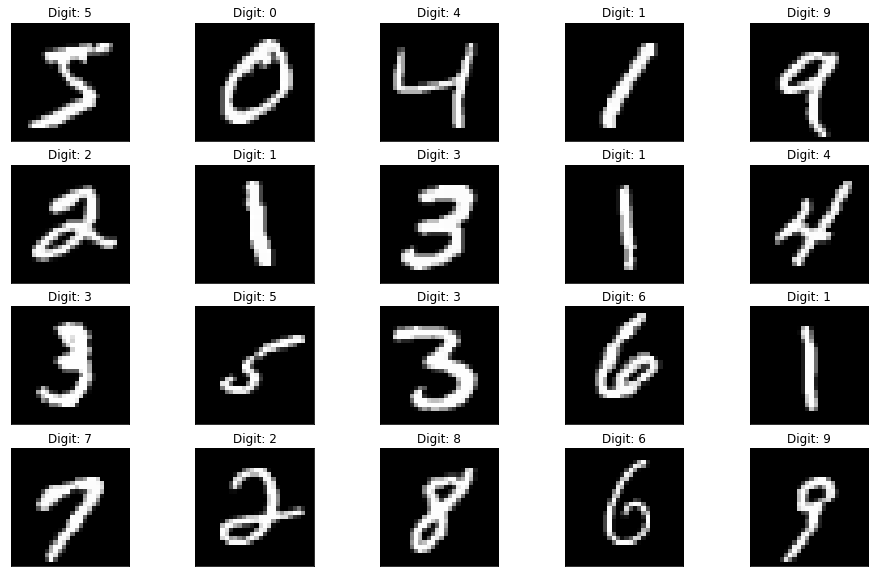

In [ ]:
#This defines a function named plot_digit that accepts four parameters:
#image: The image data to be plotted.
#digit: The actual digit label of the image.
#plt: Reference to the matplotlib.pyplot module, used for plotting.
#i: The index for plotting in a grid layout.
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap=plt.get_cmap('gray')) # argument ensures that the image is shown in a grayscale color map, where 0 (black) represents no brightness and 255 (white) represents full brightness.
    plt.title(f"Digit: {digit}") #Adds a title above each image, showing the actual digit (label) for that image
                                 #verify if the images are correctly labeled.
    plt.xticks([])
    plt.yticks([])
#These remove the x and y axis tick marks for each subplot, which makes the display cleaner and emphasizes the images without distracting tick marks.    
plt.figure(figsize=(16, 10 )) #Creates a new figure with a custom size of 16x10 inches.
for i in range(20):            #Loops through the first 20 images in the training set
    plot_digit(X_train[i], y_train[i], plt, i)
#Calls the plot_digit function to plot each image along with its label in the specified grid position.    
plt.show()

In [ ]:
X_tarin = X_train.reshape((X_train.shape+ (1,)))
X_test = X_test.reshape((X_test.shape+(1,)))

#ensures they meet the input requirements for convolutional layers.
#reshapes the MNIST images from (28, 28) to (28, 28, 1), adding a third dimension for the single grayscale channel

In [11]:
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [ ]:
# Defining the model's architecture
#Creates a sequential model, which is a simple way to stack layers linearly.
model = Sequential([
    Conv2D(32,(3,3), activation="relu",input_shape=(28,28,1)), #Adds a convolutional layer
    MaxPooling2D((2,2)), #Adds a pooling layer that downsample
    Flatten(), #Flattens the 2D output from the previous layer into a 1D vector for the fully connected layers.
    Dense(100,activation="relu"), #Adds a fully connected layer with 100 neurons and ReLU activation. hiiden layer
    Dense(10,activation="softmax") # The output layer with 10 neurons (one for each digit class) and softmax activation, producing a probability distribution over the classes.
])

In [ ]:
#The learning rate controls the step size for updates, and momentum helps accelerate convergence by smoothing updates.
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy", #which is suitable for multi-class classification problems where labels are integers 
    metrics=["accuracy"]
    #Specifies accuracy as the evaluation metric, allowing the model to report the percentage of correct predictions during training and evaluation.
)


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

In [ ]:
# Assuming you have X and y loaded, which represent the features and labels respectively
# Split the data into training and validation sets (e.g., 80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
#Stores training history
# Now you can use X_val and y_val in model.fit
Model_log = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=15,
    verbose=1, #Displays detailed progress, showing loss and accuracy for each epoch.
    validation_data=(X_val, y_val)# Uses a separate validation dataset
)

Epoch 1/10
3200/3200 [==============================] - 108s 15ms/step - loss: 3.1938 - accuracy: 0.1095 - val_loss: 2.3031 - val_accuracy: 0.1016
Epoch 2/10
3200/3200 [==============================] - 47s 15ms/step - loss: 2.3027 - accuracy: 0.1089 - val_loss: 2.3041 - val_accuracy: 0.0978
Epoch 3/10
3200/3200 [==============================] - 47s 15ms/step - loss: 2.3026 - accuracy: 0.1108 - val_loss: 2.3037 - val_accuracy: 0.0995
Epoch 4/10
3200/3200 [==============================] - 46s 14ms/step - loss: 2.3029 - accuracy: 0.1094 - val_loss: 2.3031 - val_accuracy: 0.1082
Epoch 5/10
3200/3200 [==============================] - 49s 15ms/step - loss: 2.3027 - accuracy: 0.1081 - val_loss: 2.3035 - val_accuracy: 0.1102
Epoch 6/10
3200/3200 [==============================] - 49s 15ms/step - loss: 2.3027 - accuracy: 0.1117 - val_loss: 2.3022 - val_accuracy: 0.1102
Epoch 7/10
3200/3200 [==============================] - 45s 14ms/step - loss: 2.3029 - accuracy: 0.1086 - val_loss: 2.3033 

1/1 [==============================] - 0s 20ms/step


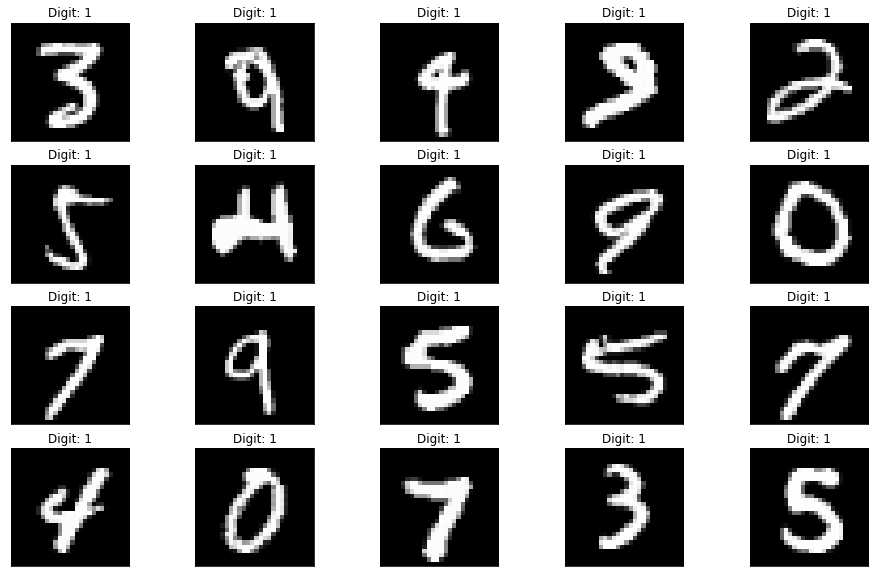

In [ ]:
plt.figure(figsize=(16, 10)) #new figure with a specified size for the plot
for i in range(20):          #A loop is set up to run 20 times
    image = random.choice(X_test).squeeze() #randomly selects one image from the test set
                                           #removes any single-dimensional entries from the shape of the image.
    digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1)
    #The image is reshaped to add the batch dimension (from (28, 28) to (1, 28, 28, 1)) since the model expects the input to be in batches, even if it's just one image.
    plot_digit(image, digit, plt, i)
plt.show()


In [ ]:
predictions = np.argmax(model.predict(X_test),axis=-1)
accuracy_score(y_test,predictions)

#The code predicts the labels for all test images and then evaluates the model's accuracy by comparing the predicted labels to the true labels in y_test.
# The output is the accuracy score, a number between 0 and 1, where 1 means perfect accuracy and 0 means no correct predictions.

313/313 [==============================] - 2s 6ms/step


0.1135

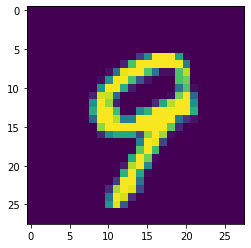

In [ ]:
n = random.randint(0,9999)
plt.imshow(X_test[n])
plt.show()
# randomly selects a number

In [ ]:
predicted_value = model.predict(X_test)
print("Handwritten number in the image is = %d" %np.argmax(predicted_value[n]))
#This code snippet is making a prediction for the n-th image in the test dataset, X_test, and then printing the predicted label (digit) based on the model’s output.

313/313 [==============================] - 2s 6ms/step
Handwritten number in the image is = 1


In [20]:
# Estimating the model's performance
score = model.evaluate(X_test,y_test,verbose=0)
print('Test loss:' , score[0])
print('Testaccuracy:',score[1])

Test loss: 2.302887201309204
Testaccuracy: 0.11349999904632568
